In [1]:
#impoert all the required libraries
# Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import sklearn libraries for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


In [6]:
#load the dataset of the titanic
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
#drop the dead column
df.drop('deck',axis=1,inplace=True)

# #impute the missing values
# df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)
# df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

# #impute the missing values
# df['age'].fillna(df['age'].median(),inplace=True)

# #impute the missing values using simple imputer
#age and fare columns

imputer=SimpleImputer(strategy='median')
df[['age','fare']]=imputer.fit_transform(df[['age','fare']])

#using mode for categorical embark_town,embarked
imputer=SimpleImputer(strategy='most_frequent')
df[['embark_town','embarked']]=imputer.fit_transform(df[['embark_town','embarked']])

In [8]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [9]:
#label encode of categorical columns using for loop

le=LabelEncoder()
for col in df.columns:
    if df[col].dtypes=='object' or df[col].dtypes=='category':
        df[col]=le.fit_transform(df[col])


In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [11]:
#split the dataset into X and y
X = df.drop('survived', axis=1)
y = df['survived']

In [13]:
#split the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
#now create fit and predict the model

#create the model
Dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
#fit the model
Dt_model.fit(X_train,y_train)
#predict the model
y_pred=Dt_model.predict(X_test)

In [51]:
#Evaluate the model 
print('confusion matrix is \n', confusion_matrix(y_test,y_pred))
print('Classification report is \n',classification_report(y_test,y_pred))




confusion matrix is 
 [[92 13]
 [19 55]]


TypeError: 'str' object is not callable

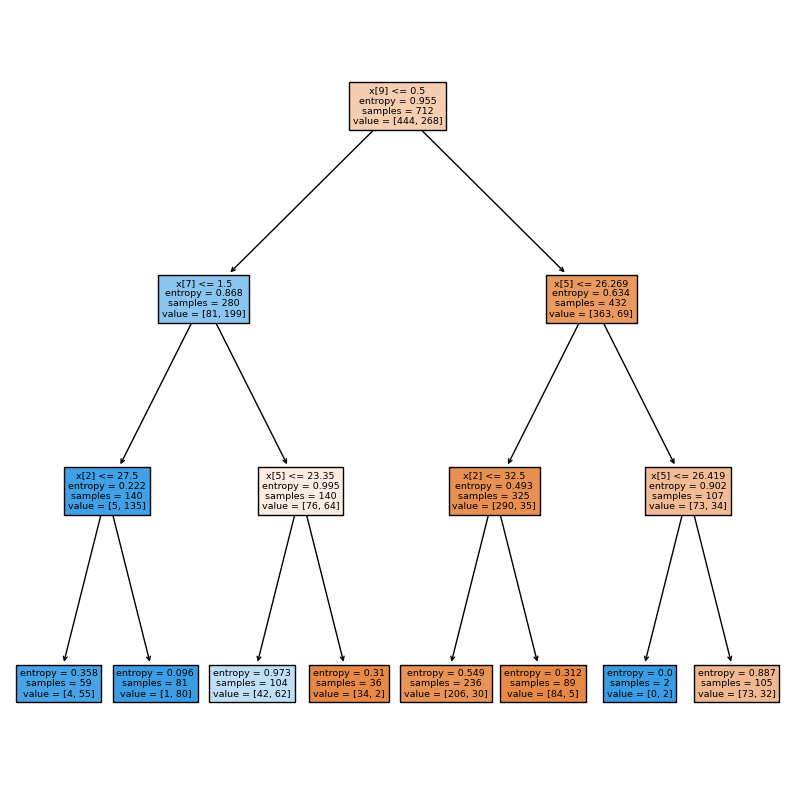

In [52]:
#plot the decision tree
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(Dt_model,filled=True)
plt.show()

In [21]:
#save the decision tree calssifier
from sklearn.tree import export_graphviz
export_graphviz(Dt_model,out_file='./save_models/Decision_tree.dot',feature_names=X.columns,rounded=True,filled=True)


# descion tree with second methods

In [36]:
#load the dataset of the titanic

df_t=sns.load_dataset('titanic')
df_t.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [37]:
#drop the deck column
df_t = df_t.drop('deck', axis=1)

#impute the missing values 
imputer=SimpleImputer(strategy='median')
df[['age','fare']]=imputer.fit_transform(df[['age','fare']])

#using mode for categorical embark_town,embarked
imputer=SimpleImputer(strategy='most_frequent')
df[['embark_town','embarked']]=imputer.fit_transform(df[['embark_town','embarked']])

In [38]:
#split the dataset into X and y
X = df.drop(['survived','alive'], axis=1)
y = df['survived']

In [39]:
#encode the categorical columns using label encoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtypes=='object' or df[col].dtypes=='category':
        df[col]=le.fit_transform(df[col])


In [40]:
#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#now create fit and predict the model
# Create an instance of the DecisionTreeClassifier
model = DecisionTreeClassifier( criterion='gini', max_depth=5, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

In [49]:
#Evaluate the model 
print('confusion matrix is \n', confusion_matrix(y_test,y_pred))
print('Classification report is \n',classification_report(y_test,y_pred))

confusion matrix is 
 [[91 14]
 [21 53]]


TypeError: 'str' object is not callable

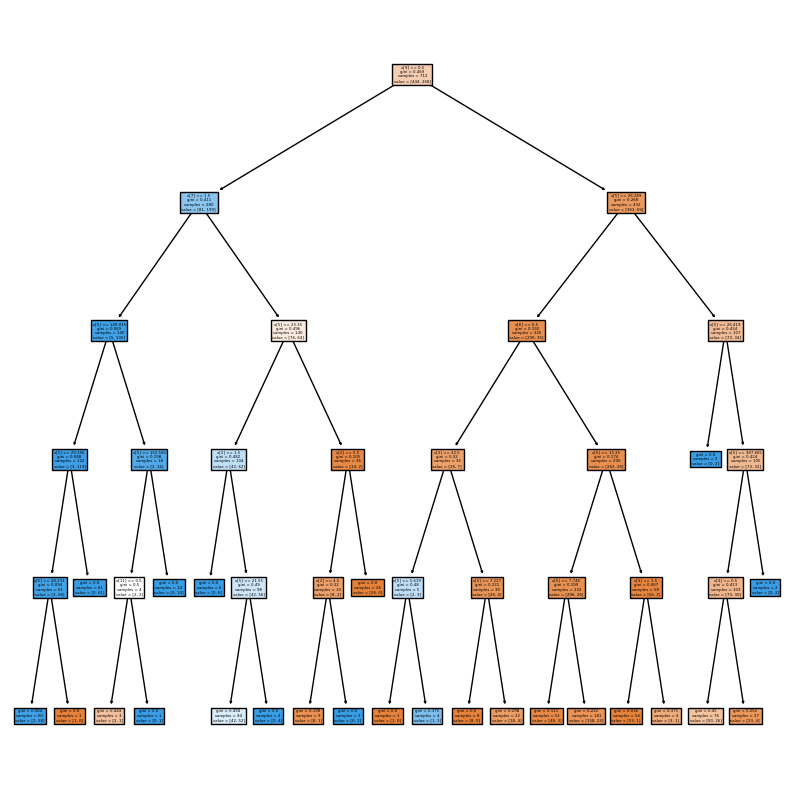

In [48]:
#plot the decision tree
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True)
plt.show()